<a href="https://colab.research.google.com/github/Zakibrahmi/dataAnalysis/blob/main/Activation_Functions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Here’s a step-by-step tutorial to compare the performance of different activation functions in a neural network using Python. We’ll use PyTorch for the implementation and focus on comparing Sigmoid, Tanh, ReLU, Leaky ReLU, ELU, and Swish activation functions.

Objective
We’ll compare the performance of different activation functions by training simple neural networks on a dataset (e.g., MNIST) and measuring:

* Accuracy
* Training time
* Loss convergence rate


In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import time
import matplotlib.pyplot as plt
# Define transformation to normalize the data
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# Download and load the training and test datasets
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)


Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:00<00:00, 18.4MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 485kB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:00<00:00, 4.40MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 3.60MB/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



**Define Neural Network Model** with Different Activation Functions
We’ll define a simple feedforward neural network model and modify the activation function. For comparison, we’ll use **Sigmoid**, **Tanh**, **ReLU**, **Leaky ReLU**, **ELU**, and **Swish**.

In [5]:
class SimpleNN(nn.Module):
    def __init__(self, activation_func):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(28*28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)
        self.activation_func = activation_func

    def forward(self, x):
        x = x.view(-1, 28*28)  # Flatten the image
        x = self.fc1(x)
        x = self.activation_func(x)
        x = self.fc2(x)
        x = self.activation_func(x)
        x = self.fc3(x)
        return x


**Activation Functions**
Now, we will define each activation function, including ReLU, Leaky ReLU, ELU, and Swish.


In [6]:
activation_functions = {
    'Sigmoid': nn.Sigmoid(),
    'Tanh': nn.Tanh(),
    'ReLU': nn.ReLU(),
    'Leaky ReLU': nn.LeakyReLU(0.01),
    'ELU': nn.ELU(),
    'Swish': nn.SiLU()  # PyTorch's implementation of Swish
}


**Training and Evaluation Function**
Let’s create functions to train and evaluate the model. We will measure the accuracy and training time for each activation function.

In [7]:
def train_model(activation_func):
    # Initialize model, loss function, and optimizer
    model = SimpleNN(activation_func).cuda()
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    # Training loop
    start_time = time.time()
    for epoch in range(5):  # Run for 5 epochs
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0
        for inputs, labels in trainloader:
            inputs, labels = inputs.cuda(), labels.cuda()

            optimizer.zero_grad()

            # Forward pass
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            # Backward pass and optimization
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

            # Calculate accuracy
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        accuracy = 100 * correct / total
        print(f"Epoch {epoch+1}, Loss: {running_loss/len(trainloader)}, Accuracy: {accuracy}%")

    training_time = time.time() - start_time
    print(f"Training Time: {training_time:.2f} seconds")

    return model, training_time

def evaluate_model(model):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in testloader:
            inputs, labels = inputs.cuda(), labels.cuda()
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = 100 * correct / total
    print(f"Test Accuracy: {accuracy}%")
    return accuracy


**Training and Evaluation for Each Activation Function**

In [8]:
results = {}

for name, activation_func in activation_functions.items():
    print(f"Training with {name} Activation Function")
    model, training_time = train_model(activation_func)
    accuracy = evaluate_model(model)
    results[name] = {'accuracy': accuracy, 'training_time': training_time}

# Display the results
for name, result in results.items():
    print(f"{name}: Accuracy = {result['accuracy']}%, Training Time = {result['training_time']:.2f} seconds")


Training with Sigmoid Activation Function
Epoch 1, Loss: 0.6500631938261519, Accuracy: 83.76666666666667%
Epoch 2, Loss: 0.2180408530834832, Accuracy: 93.77%
Epoch 3, Loss: 0.15565687230528036, Accuracy: 95.53%
Epoch 4, Loss: 0.11948564032148291, Accuracy: 96.51666666666667%
Epoch 5, Loss: 0.0988520856158359, Accuracy: 97.08%
Training Time: 70.95 seconds
Test Accuracy: 96.78%
Training with Tanh Activation Function
Epoch 1, Loss: 0.3491975483236346, Accuracy: 90.15%
Epoch 2, Loss: 0.16734717489639198, Accuracy: 94.935%
Epoch 3, Loss: 0.12849084118992757, Accuracy: 96.10166666666667%
Epoch 4, Loss: 0.11754679580681773, Accuracy: 96.44%
Epoch 5, Loss: 0.10888358026043947, Accuracy: 96.61666666666666%
Training Time: 70.38 seconds
Test Accuracy: 95.88%
Training with ReLU Activation Function
Epoch 1, Loss: 0.38517230834518035, Accuracy: 88.46833333333333%
Epoch 2, Loss: 0.1839165917472608, Accuracy: 94.48666666666666%
Epoch 3, Loss: 0.13605725933124485, Accuracy: 95.81833333333333%
Epoch 4, 

**Visualize the Results**
To compare the performance of the activation functions, let’s plot the training times and accuracies.

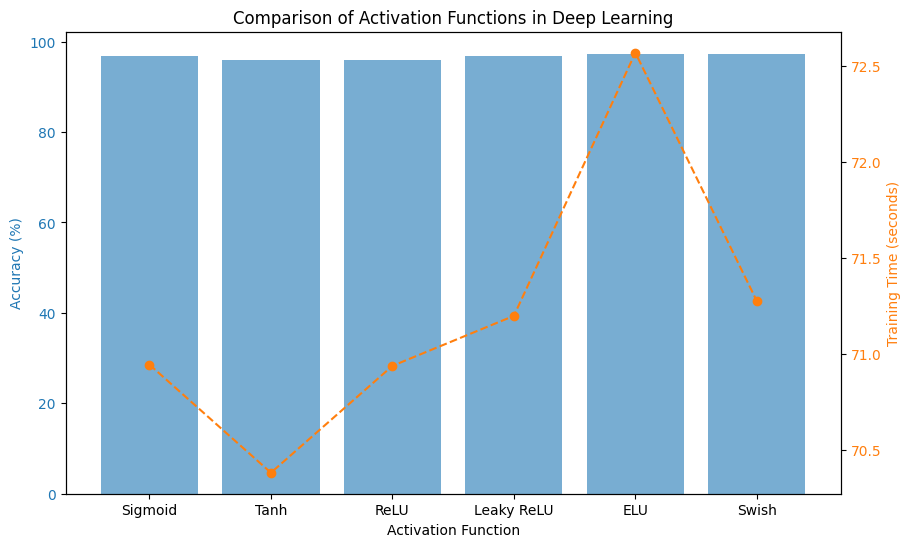

In [9]:
# Plotting the results
activation_names = list(results.keys())
accuracies = [result['accuracy'] for result in results.values()]
training_times = [result['training_time'] for result in results.values()]

fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot accuracies
ax1.set_xlabel('Activation Function')
ax1.set_ylabel('Accuracy (%)', color='tab:blue')
ax1.bar(activation_names, accuracies, color='tab:blue', alpha=0.6)
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create a second y-axis to plot training times
ax2 = ax1.twinx()
ax2.set_ylabel('Training Time (seconds)', color='tab:orange')
ax2.plot(activation_names, training_times, color='tab:orange', marker='o', linestyle='--')
ax2.tick_params(axis='y', labelcolor='tab:orange')

plt.title('Comparison of Activation Functions in Deep Learning')
plt.show()
